In [14]:
using Plots
using LaTeXStrings

const FIGURES_DIR = "../../figures/"

"../../figures/"

In [11]:
function plot_curve!(
    plotobj::Plots.Plot,
    γ,
    a::Real,
    b::Real;
    step_size::Real=0.01,
    arrow_points::Array{T}=[],
    δ::Real=1e-3,
    color::Union{RGB,Symbol}=:black,
    linewidth::Int=1,
    label::Union{AbstractString,Nothing}=nothing,
)::Plots.Plot where {T<:Real}
    # Create a range of values for t
    t = a:step_size:b

    # Parse the color
    if typeof(color) == Symbol
        color = Colors.parse(Colorant, color)
    end

    # Plot the curve
    plot!(
        plotobj,
        real(γ.(t)),
        imag(γ.(t)),
        color=color,
        xlabel=L"\mathrm{Re}(z)",
        ylabel=L"\mathrm{Im}(z)",
        linewidth=linewidth,
        label=label,
    )

    # Plot the arrows in the direction of the curve
    for t in arrow_points
        quiver!(
            [real(γ(t))],
            [imag(γ(t))],
            quiver=(
                [real(γ(t + δ) - γ(t))],
                [imag(γ(t + δ) - γ(t))],
            ),
            color=color,
            linewidth=linewidth,
        )
    end

    return plotobj
end

function plot_curve!(
    γ,
    a::Real,
    b::Real;
    step_size::Real=0.01,
    arrow_points::Array{T}=[],
    δ::Real=1e-3,
    color::Union{RGB,Symbol}=:black,
    linewidth::Int=1,
    label::Union{AbstractString,Nothing}=nothing,
)::Plots.Plot where {T<:Real}
    # Get the current plot object
    plotobj = current()

    # Plot in the current plot object
    plot_curve!(
        plotobj,
        γ,
        a,
        b,
        step_size=step_size,
        arrow_points=arrow_points,
        δ=δ,
        color=color,
        linewidth=linewidth,
        label=label,
    )
end

function plot_curve(
    γ,
    a::Real,
    b::Real;
    step_size::Real=0.01,
    arrow_points::Array{T}=[],
    δ::Real=1e-3,
    color::Union{RGB,Symbol}=:black,
    linewidth::Int=1,
    label::Union{AbstractString,Nothing}=nothing,
)::Plots.Plot where {T<:Real}
    # Create a new plot object
    plotobj = plot()

    # Plot in the current plot object
    plot_curve!(
        plotobj,
        γ,
        a,
        b,
        step_size=step_size,
        arrow_points=arrow_points,
        δ=δ,
        color=color,
        linewidth=linewidth,
        label=label,
    )
end


plot_curve (generic function with 1 method)

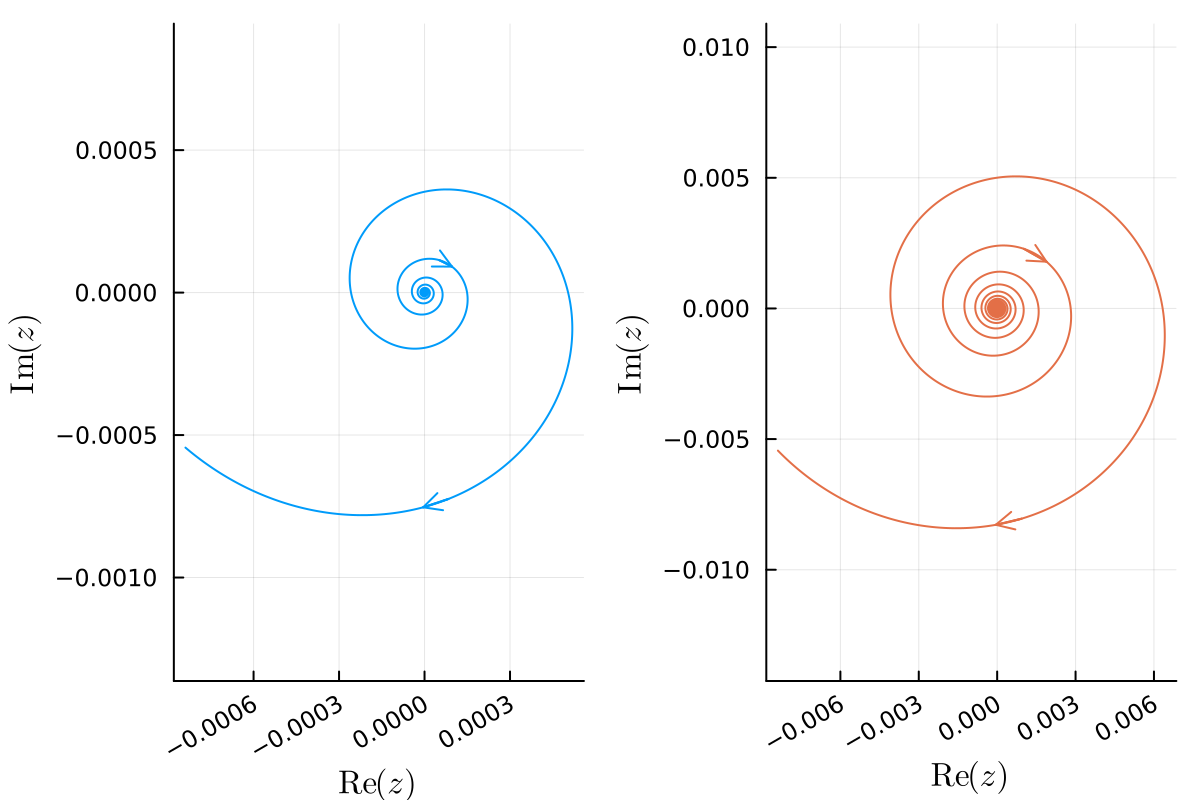

In [61]:
a = 1e-5
b = 1e-1
step_size = 1e-6
arrow_points = [0.05, 0.09]

p1 = plot_curve(
    t -> t^3 * cos(1 / t) + im * t^3 * sin(1 / t),
    a,
    b,
    step_size=step_size,
    arrow_points=arrow_points,
    linewidth=1,
    color=palette(:default)[1]
)

p2 = plot_curve(
    t -> t^2 * cos(1 / t) + im * t^2 * sin(1 / t),
    a,
    b,
    step_size=step_size,
    arrow_points=arrow_points,
    linewidth=1,
    color=palette(:default)[2]
)

plot(
    p1,
    p2,
    layout=(1, 2),
    xrotation=30.0,
    aspect_ratio=:equal,
    legend=nothing,
    dpi=200,
)

In [62]:
savefig(joinpath(FIGURES_DIR, "two-spirals.png"))

"/Users/isaac/Documents/math/complex-analysis/figures/two-spirals.png"